<a href="https://colab.research.google.com/github/Sameer-Tahir/Project_DS/blob/main/Data_Analysis/TTV_Split/Data_Split_TTV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Sameer-Tahir/Project_DS.git

fatal: destination path 'Project_DS' already exists and is not an empty directory.


In [1]:
# Import libraries
import pandas as pd   # data processing
import numpy as np    # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt

#Train Test Validation Split

In [2]:
dfk = pd.read_csv("/content/Kernel_dataset.csv")

In [3]:
dfk

,time,ase_spec,block_block_bio_backmerge,block_block_bio_queue,block_block_bio_remap,block_block_dirty_buffer,block_block_getrq,block_block_plug,block_block_rq_complete,block_block_rq_insert,...,vfp_spec,writeback_writeback_dirty_inode,writeback_writeback_dirty_inode_start,writeback_writeback_dirty_page,writeback_writeback_mark_inode_dirty,State,Attack,Scenario,Label,interface
0,5.001477,693371795,0,0,0,0,0,0,0,0,...,215675,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
1,5.001487,699964025,0,0,0,0,0,0,0,0,...,72029,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
2,5.001641,549770341,0,0,0,0,0,0,0,0,...,87776,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
3,5.003762,571970875,0,0,0,0,0,0,0,0,...,239473,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
4,10.065740,553199786,0,0,0,0,0,0,0,0,...,186538,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6161,283.646045,5463807,0,0,0,0,0,0,0,0,...,828202,0,0,0,0,Charging,synonymous-ip-flood,DoS,attack,ocpp
6162,288.714173,10977108,0,0,0,0,0,0,0,0,...,337160,0,0,0,0,Charging,synonymous-ip-flood,DoS,attack,ocpp
6163,293.790086,3683292,0,0,0,0,0,0,0,0,...,151134,0,0,0,0,Charging,synonymous-ip-flood,DoS,attack,ocpp
6164,298.861925,5165840,0,0,0,0,0,0,0,0,...,314585,0,0,0,0,Charging,synonymous-ip-flood,DoS,attack,ocpp


In [4]:
dfk1=dfk.copy()

In [5]:
# Step 1: Drop metadata columns
dfk1_clean = dfk1.drop(columns=['Label', 'Scenario', 'interface'], errors='ignore')

In [6]:
dfk1_clean

,time,ase_spec,block_block_bio_backmerge,block_block_bio_queue,block_block_bio_remap,block_block_dirty_buffer,block_block_getrq,block_block_plug,block_block_rq_complete,block_block_rq_insert,...,unaligned_ld_spec,unaligned_ldst_spec,unaligned_st_spec,vfp_spec,writeback_writeback_dirty_inode,writeback_writeback_dirty_inode_start,writeback_writeback_dirty_page,writeback_writeback_mark_inode_dirty,State,Attack
0,5.001477,693371795,0,0,0,0,0,0,0,0,...,21393263,21235046,230217,215675,0,0,0,0,Charging,cryptojacking
1,5.001487,699964025,0,0,0,0,0,0,0,0,...,20477386,20587809,85302,72029,0,0,0,0,Charging,cryptojacking
2,5.001641,549770341,0,0,0,0,0,0,0,0,...,18897596,18987543,169154,87776,0,0,0,0,Charging,cryptojacking
3,5.003762,571970875,0,0,0,0,0,0,0,0,...,17838136,17946801,325006,239473,0,0,0,0,Charging,cryptojacking
4,10.065740,553199786,0,0,0,0,0,0,0,0,...,16962451,16782491,289934,186538,0,0,0,0,Charging,cryptojacking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6161,283.646045,5463807,0,0,0,0,0,0,0,0,...,2276063,3411797,677442,828202,0,0,0,0,Charging,synonymous-ip-flood
6162,288.714173,10977108,0,0,0,0,0,0,0,0,...,2325968,3090660,671197,337160,0,0,0,0,Charging,synonymous-ip-flood
6163,293.790086,3683292,0,0,0,0,0,0,0,0,...,2715096,3195777,620972,151134,0,0,0,0,Charging,synonymous-ip-flood
6164,298.861925,5165840,0,0,0,0,0,0,0,0,...,2255394,3242984,750083,314585,0,0,0,0,Charging,synonymous-ip-flood


# Splitting

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Encode 'State' as binary (Idle=0, Charging=1)
dfk1_encoded = dfk1_clean.copy()
dfk1_encoded['State'] = dfk1_encoded['State'].map({'idle': 0, 'Charging': 1})

# Step 2: Create stratification key (Attack + State)
dfk1_encoded['stratify_key'] = dfk1_encoded['Attack'].astype(str) + "_" + dfk1_encoded['State'].astype(str)

# Step 3: Train/Validation/Test Split
# First split: Train + Temp (80% train, 20% temp)
train_df, temp_df = train_test_split(
    dfk1_encoded,
    test_size=0.2,
    stratify=dfk1_encoded['stratify_key'],
    random_state=42
)

# Second split: Validation + Test (10% each of total)
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df['stratify_key'],
    random_state=42
)

# Step 4: Drop stratification key from final splits
for df in [train_df, val_df, test_df]:
    df.drop(columns=['stratify_key'], inplace=True)

# Step 5: Save splits to disk
train_df.to_csv('dfk1_train.csv', index=False)
val_df.to_csv('dfk1_val.csv', index=False)
test_df.to_csv('dfk1_test.csv', index=False)

print(train_df['State'].value_counts())
print(val_df['State'].value_counts())
print(test_df['State'].value_counts())

State
1    2866
0    2066
Name: count, dtype: int64
State
1    359
0    258
Name: count, dtype: int64
State
1    359
0    258
Name: count, dtype: int64


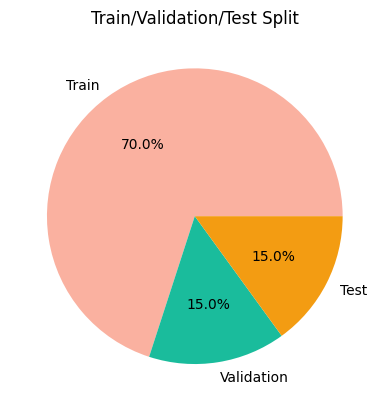

In [21]:
sizes = [0.7, 0.15, 0.15]
labels = ['Train', 'Validation', 'Test']

plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=['#fab1a0', '#1abc9c', '#f39c12'] # ✅ correct argument
)
plt.title("Train/Validation/Test Split")
plt.show()

In [ ]:
dfk1_encoded

,time,ase_spec,block_block_bio_backmerge,block_block_bio_queue,block_block_bio_remap,block_block_dirty_buffer,block_block_getrq,block_block_plug,block_block_rq_complete,block_block_rq_insert,...,unaligned_ldst_spec,unaligned_st_spec,vfp_spec,writeback_writeback_dirty_inode,writeback_writeback_dirty_inode_start,writeback_writeback_dirty_page,writeback_writeback_mark_inode_dirty,State,Attack,stratify_key
0,5.001477,693371795,0,0,0,0,0,0,0,0,...,21235046,230217,215675,0,0,0,0,1,cryptojacking,cryptojacking_1
1,5.001487,699964025,0,0,0,0,0,0,0,0,...,20587809,85302,72029,0,0,0,0,1,cryptojacking,cryptojacking_1
2,5.001641,549770341,0,0,0,0,0,0,0,0,...,18987543,169154,87776,0,0,0,0,1,cryptojacking,cryptojacking_1
3,5.003762,571970875,0,0,0,0,0,0,0,0,...,17946801,325006,239473,0,0,0,0,1,cryptojacking,cryptojacking_1
4,10.065740,553199786,0,0,0,0,0,0,0,0,...,16782491,289934,186538,0,0,0,0,1,cryptojacking,cryptojacking_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6161,283.646045,5463807,0,0,0,0,0,0,0,0,...,3411797,677442,828202,0,0,0,0,1,synonymous-ip-flood,synonymous-ip-flood_1
6162,288.714173,10977108,0,0,0,0,0,0,0,0,...,3090660,671197,337160,0,0,0,0,1,synonymous-ip-flood,synonymous-ip-flood_1
6163,293.790086,3683292,0,0,0,0,0,0,0,0,...,3195777,620972,151134,0,0,0,0,1,synonymous-ip-flood,synonymous-ip-flood_1
6164,298.861925,5165840,0,0,0,0,0,0,0,0,...,3242984,750083,314585,0,0,0,0,1,synonymous-ip-flood,synonymous-ip-flood_1


# Test Data

In [ ]:
dfk1_test = pd.read_csv("/content/dfk1_test.csv")

In [ ]:
dfk1_test

,time,ase_spec,block_block_bio_backmerge,block_block_bio_queue,block_block_bio_remap,block_block_dirty_buffer,block_block_getrq,block_block_plug,block_block_rq_complete,block_block_rq_insert,...,unaligned_ld_spec,unaligned_ldst_spec,unaligned_st_spec,vfp_spec,writeback_writeback_dirty_inode,writeback_writeback_dirty_inode_start,writeback_writeback_dirty_page,writeback_writeback_mark_inode_dirty,State,Attack
0,1866.397638,5510264,0,0,0,0,0,0,0,0,...,1482502,1657598,295326,448895,0,0,0,0,1,none
1,1413.209545,543272755,0,0,0,0,0,0,0,0,...,17947572,18015604,256089,216422,0,0,0,0,1,cryptojacking
2,3621.601482,767702884,0,0,0,0,0,0,0,0,...,21480385,21812067,110296,20258,0,0,0,0,0,cryptojacking
3,304.189097,816324,0,0,0,0,0,0,0,0,...,157514,191078,36418,951887,0,0,0,0,0,port-scan
4,2023.574671,5208169,0,0,0,0,0,0,0,0,...,1215605,1661536,309479,288903,0,0,0,0,1,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,5.001477,693371795,0,0,0,0,0,0,0,0,...,21393263,21235046,230217,215675,0,0,0,0,1,cryptojacking
613,1398.811733,568647592,0,0,0,0,0,0,0,0,...,17275958,17521475,306841,216083,0,0,0,0,1,cryptojacking
614,675.881569,551632312,0,0,0,0,0,0,0,0,...,17276172,17639870,240644,185759,0,0,0,0,1,cryptojacking
615,635.197469,539306329,0,0,0,0,0,0,0,0,...,18437936,18592710,229924,177478,0,0,0,0,1,cryptojacking


#Train Data

In [ ]:
dfk1_train = pd.read_csv("/content/dfk1_train.csv")

In [ ]:
dfk1_train

,time,ase_spec,block_block_bio_backmerge,block_block_bio_queue,block_block_bio_remap,block_block_dirty_buffer,block_block_getrq,block_block_plug,block_block_rq_complete,block_block_rq_insert,...,unaligned_ld_spec,unaligned_ldst_spec,unaligned_st_spec,vfp_spec,writeback_writeback_dirty_inode,writeback_writeback_dirty_inode_start,writeback_writeback_dirty_page,writeback_writeback_mark_inode_dirty,State,Attack
0,349.722528,4319648,0,1108,1108,0,1048,0,1048,1048,...,5049764,7581292,1827261,1577141,0,0,0,0,1,service-detection
1,136.799696,574783927,0,0,0,0,0,0,0,0,...,18810799,19448396,200177,144046,0,0,0,0,1,cryptojacking
2,2701.251731,5210377,0,0,0,0,0,0,0,0,...,1446114,1783319,303936,244920,0,0,0,0,1,none
3,5714.273482,1219581,0,0,0,0,0,0,0,0,...,1507090,1657240,143458,39209,0,0,0,0,0,none
4,238.126488,1437,0,0,0,0,0,0,0,0,...,361015,565674,182010,1284,0,0,0,0,0,icmp-fragmentation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927,1748.463668,5229100,0,0,0,0,0,0,0,0,...,1623961,1855385,290985,221729,0,0,0,0,1,none
4928,3542.435690,645314103,0,0,0,0,0,0,0,0,...,21496481,21527571,49318,7442,0,0,0,0,0,cryptojacking
4929,91.146561,6067196,0,0,0,0,0,0,0,0,...,2742415,3394882,786350,228201,0,0,0,0,1,push-ack-flood
4930,2196.555219,5113594,0,0,0,0,0,0,0,0,...,1392297,1683220,298938,221192,0,0,0,0,1,none


# Validation Data

In [ ]:
dfk1_val = pd.read_csv("/content/dfk1_val.csv")

In [ ]:
dfk1_val

,time,ase_spec,block_block_bio_backmerge,block_block_bio_queue,block_block_bio_remap,block_block_dirty_buffer,block_block_getrq,block_block_plug,block_block_rq_complete,block_block_rq_insert,...,unaligned_ld_spec,unaligned_ldst_spec,unaligned_st_spec,vfp_spec,writeback_writeback_dirty_inode,writeback_writeback_dirty_inode_start,writeback_writeback_dirty_page,writeback_writeback_mark_inode_dirty,State,Attack
0,5704.149378,0,0,0,0,0,0,0,0,0,...,47907,84868,16699,0,0,0,0,0,0,none
1,2581.189484,6064826,0,0,0,0,0,0,0,0,...,1526525,1651343,251602,157574,0,0,0,0,1,none
2,4552.851926,2039,0,0,0,0,0,0,0,0,...,14592,18852,2483,0,0,0,0,0,0,none
3,70.895024,2100450,0,0,0,0,0,0,0,0,...,3110150,3222619,196254,1258420,0,0,0,0,0,os-fingerprinting
4,303.816749,2096291,0,0,0,0,0,0,0,0,...,1410912,1740880,320395,263787,0,0,0,0,1,aggressive-scan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,248.283685,573306430,0,0,0,0,0,0,0,0,...,18739132,18499312,193573,120155,0,0,0,0,1,cryptojacking
613,116.369389,561693041,0,0,0,0,0,0,0,0,...,17961856,18610844,266113,145951,0,0,0,0,1,cryptojacking
614,20.194681,3501157,0,0,0,0,0,0,0,0,...,4170656,5811528,1228669,634848,0,0,0,0,1,service-detection
615,1887.825518,7981080,0,0,0,0,0,0,0,0,...,2476424,2720613,364537,230360,0,0,0,0,1,none


# Analysis of Split

In [ ]:
def reconstruct_state(df):
    # Reconstruct 'State' from 0/1 encoding
    if 'State' in df.columns:
        return df['State'].map({1: 'Charging', 0: 'Idle'})
    else:
        raise KeyError("State column not found.")

def analyze_split(df, name):
    df = df.copy()
    df['State_str'] = reconstruct_state(df)  # create human-readable state

    total_rows = len(df)
    print(f"\n📊 {name} Split — Total rows: {total_rows}")

    attack_state_counts = df.groupby(['Attack', 'State_str']).size().unstack(fill_value=0)
    print(attack_state_counts)

# Run analysis for each split
analyze_split(dfk1_train, "Train")
analyze_split(dfk1_val, "Validation")
analyze_split(dfk1_test, "Test")


📊 Train Split — Total rows: 4932
State_str               Charging  Idle
Attack                                
aggressive-scan               97    48
cryptojacking                921   513
icmp-flood                    53    49
icmp-fragmentation            51    44
icmp-fragmentation_old        49     0
none                         921   921
os-fingerprinting             49    49
os-scan                       47     0
port-scan                    112    49
push-ack-flood                50    52
serice-detection              48     0
service-detection             63    48
syn-flood                     50    50
syn-stealth                  103    48
synonymous-ip-flood           48    50
tcp-flood                     50    49
udp-flood                     49    47
vuln-scan                    105    49

📊 Validation Split — Total rows: 617
State_str               Charging  Idle
Attack                                
aggressive-scan               13     6
cryptojacking                11

#Analysis of encoded dataset

In [ ]:
dfk1_analysis = dfk1_encoded.copy()

# Drop stratify_key if present
if 'stratify_key' in dfk1_analysis.columns:
    dfk1_analysis.drop(columns=['stratify_key'], inplace=True)

In [ ]:
 dfk1_analysis

,time,ase_spec,block_block_bio_backmerge,block_block_bio_queue,block_block_bio_remap,block_block_dirty_buffer,block_block_getrq,block_block_plug,block_block_rq_complete,block_block_rq_insert,...,unaligned_ld_spec,unaligned_ldst_spec,unaligned_st_spec,vfp_spec,writeback_writeback_dirty_inode,writeback_writeback_dirty_inode_start,writeback_writeback_dirty_page,writeback_writeback_mark_inode_dirty,State,Attack
0,5.001477,693371795,0,0,0,0,0,0,0,0,...,21393263,21235046,230217,215675,0,0,0,0,1,cryptojacking
1,5.001487,699964025,0,0,0,0,0,0,0,0,...,20477386,20587809,85302,72029,0,0,0,0,1,cryptojacking
2,5.001641,549770341,0,0,0,0,0,0,0,0,...,18897596,18987543,169154,87776,0,0,0,0,1,cryptojacking
3,5.003762,571970875,0,0,0,0,0,0,0,0,...,17838136,17946801,325006,239473,0,0,0,0,1,cryptojacking
4,10.065740,553199786,0,0,0,0,0,0,0,0,...,16962451,16782491,289934,186538,0,0,0,0,1,cryptojacking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6161,283.646045,5463807,0,0,0,0,0,0,0,0,...,2276063,3411797,677442,828202,0,0,0,0,1,synonymous-ip-flood
6162,288.714173,10977108,0,0,0,0,0,0,0,0,...,2325968,3090660,671197,337160,0,0,0,0,1,synonymous-ip-flood
6163,293.790086,3683292,0,0,0,0,0,0,0,0,...,2715096,3195777,620972,151134,0,0,0,0,1,synonymous-ip-flood
6164,298.861925,5165840,0,0,0,0,0,0,0,0,...,2255394,3242984,750083,314585,0,0,0,0,1,synonymous-ip-flood


In [ ]:
def reconstruct_state(df):
    # Reconstruct 'State' from 0/1 encoding
    if 'State' in df.columns:
        return df['State'].map({1: 'Charging', 0: 'Idle'})
    else:
        raise KeyError("State column not found.")

def analyze_split(df, name):
    df = df.copy()
    df['State_str'] = reconstruct_state(df)  # human-readable state

    total_rows = len(df)
    print(f"\n📊 {name} Split — Total rows: {total_rows}")

    # Attack × State breakdown
    attack_state_counts = df.groupby(['Attack', 'State_str']).size().unstack(fill_value=0)

    # Add row and column totals for easier inspection
    attack_state_counts['Total'] = attack_state_counts.sum(axis=1)
    attack_state_counts.loc['Total'] = attack_state_counts.sum()

    print(attack_state_counts)

# Run analysis on full encoded dataset
analyze_split(dfk1_analysis, "Full Dataset")


📊 Full Dataset Split — Total rows: 6166
State_str               Charging  Idle  Total
Attack                                       
aggressive-scan              122    60    182
cryptojacking               1151   642   1793
icmp-flood                    67    61    128
icmp-fragmentation            64    55    119
icmp-fragmentation_old        61     0     61
none                        1151  1151   2302
os-fingerprinting             62    61    123
os-scan                       59     0     59
port-scan                    140    61    201
push-ack-flood                62    65    127
serice-detection              60     0     60
service-detection             79    60    139
syn-flood                     63    63    126
syn-stealth                  129    60    189
synonymous-ip-flood           60    62    122
tcp-flood                     62    61    123
udp-flood                     61    59    120
vuln-scan                    131    61    192
Total                       3584  2582 

In [ ]:
# Copy working dataframe
dfk1_analysis = dfk1_encoded.copy()

# Collect results
charging_results = {}
idle_results = {}

# Columns to exclude from correlation
exclude_cols = ['Attack', 'State']
if 'stratify_key' in dfk1_analysis.columns:
    exclude_cols.append('stratify_key')

# Unique attack types
attack_types = dfk1_analysis['Attack'].unique()

for attack in attack_types:
    df_attack = dfk1_analysis[dfk1_analysis['Attack'] == attack]

    # Charging subset (State=1)
    df_charging = df_attack[df_attack['State'] == 1].copy()
    charging_features = df_charging.drop(columns=exclude_cols).select_dtypes(include='number')
    charging_features = charging_features.loc[:, charging_features.nunique() > 1]
    if not charging_features.empty:
        charging_corr = charging_features.corr().abs().mean().sort_values(ascending=False)
        charging_results[attack] = charging_corr.head(10)

    # Idle subset (State=0)
    df_idle = df_attack[df_attack['State'] == 0].copy()
    idle_features = df_idle.drop(columns=exclude_cols).select_dtypes(include='number')
    idle_features = idle_features.loc[:, idle_features.nunique() > 1]
    if not idle_features.empty:
        idle_corr = idle_features.corr().abs().mean().sort_values(ascending=False)
        idle_results[attack] = idle_corr.head(10)

In [ ]:
for attack in attack_types:
    print(f"\n==============================")
    print(f"🔎 Attack: {attack}")
    print("==============================")

    # Charging results
    if attack in charging_results:
        print(f"\n🔌 Charging state top features:")
        print(charging_results[attack])
    else:
        print("\n🔌 Charging state top features: (no data available)")

    # Idle results
    if attack in idle_results:
        print(f"\n🛑 Idle state top features:")
        print(idle_results[attack])
    else:
        print("\n🛑 Idle state top features: (no data available)")


🔎 Attack: cryptojacking

🔌 Charging state top features:
preemptirq_irq_disable     0.386406
preemptirq_irq_enable      0.386405
kmem_kmalloc               0.373472
kmem_kfree                 0.368032
irq_softirq_raise          0.349954
irq_softirq_exit           0.349592
irq_softirq_entry          0.349590
syscalls_sys_enter_read    0.348539
syscalls_sys_exit_read     0.348536
raw_syscalls_sys_exit      0.335431
dtype: float64

🛑 Idle state top features:
raw_syscalls_sys_exit            0.401580
raw_syscalls_sys_enter           0.401564
preemptirq_irq_enable            0.400169
preemptirq_irq_disable           0.400169
kmem_kmem_cache_alloc            0.400124
kmem_kmem_cache_free             0.395856
kmem_kmalloc                     0.394502
kmem_kfree                       0.392483
syscalls_sys_enter_newfstatat    0.390910
syscalls_sys_exit_newfstatat     0.390909
dtype: float64

🔎 Attack: none

🔌 Charging state top features:
kmem_kmalloc                0.733131
kmem_kfree          